# Hungry-Thirsty Domain

The goal of the hungry-thirsty domain is to teach an agent to eat as much as possible.
<br> There's a catch, though: the agent can only eat when it's not thirsty. <br> Thus, the agent cannot
just “hang out” at the food location and keep eating because at
some point it will become thirsty and eating will fail.

* The agent always exists for 200 timesteps.
* The grid is 4x4. Food is located in one randomly-selected corner, while water is located in a different (random) corner.
* At each timestep, the agent may take one of the following actions: move (up, down, left, right), eat, or drink. But actions can fail: 
    * The drink action fails if the agent is not at the water location.
    * The eat action fails if the agent is thirsty, or if the agent is not at the food location.
    * The move action fails if the agent tries to move through one of the red barriers (depicted below).
* If the agent eats, it becomes not-hungry for one timestep.<br>
* If the agent drinks, it becomes not-thirsty.<br>
* When the agent is not-thirsty, it becomes thirsty again with 10% probability on each successive timestep.

See an example of the game below.

In [1]:
# %matplotlib notebook
# %matplotlib
# auto reload modules
%load_ext autoreload
%autoreload 2
%matplotlib
import matplotlib.pyplot as plt
plt.ioff()
plt.ion()

Using matplotlib backend: <object object at 0x7f88dc45a550>


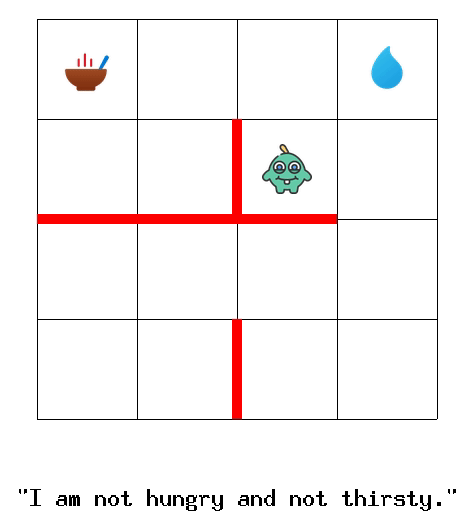

In [2]:
# import notebooks; do not edit
%run setup_reward_and_learning_alg.ipynb
%run training_and_model_eval.ipynb

# show agent 
from IPython.display import Image
Image("../Assets/h-t-small.gif", width=450)

## Your Task
We haven't specified the reward function, learning algorithm, or algorithm hyperparameters; you'll need to fill in these details using the code cells below.

## Your Study ID

Replace the YOUR_NAME string with your full name to generate a unique study ID.

Note: do *not* re-run the cells after entering data using these Jupyter notebook widgets. 

In [3]:
set_study_id()

### Design your  Reward Function and Select Your RL Algorithm

For your reward function, you need to assign a value r(s) to each state. The state is composed of the thirst and hunger status of the agent. You must assign a value for each state: 
* r(Hungry AND Thirsty) = ???; r(Hungry AND Not Thirsty) = ???; r(Not Hungry AND Thirsty) = ???; r(Not Hungry AND Not Thirsty) = ???

For your RL algorithm, you will need to choose your algorithm. Your options are: 
* A2C, DDQN, PPO

After choosing your RL algorithm, you will need to select the hyperparameters. If you change your learning algorithm, you may need to re-run the hyperparamater selection (below). 

In [4]:
# select the learning algorithm and reward function parameters 
selectors = reward_and_alg_selector()
selectors

Box(children=(Dropdown(description='Algorithm Choice', options=(None, 'A2C', 'DDQN', 'PPO'), style=Description…

### Hyperparameters

__!!! If you change your learning algorithm selection, you will need to rerun the following hyperparameter selection cell as well. !!!__

* Hyperparameters Required for All Algorithms: 
    * **Gamma**: the discount factor for the environment. A small Gamma means the agent prioritizes only immediate rewards (i.e., the agent is myopic), while a larger Gamma means the agent tends to also consider future rewards. 
    * **Num_Episodes**: the number of episodes to train for. A smaller number means the experiments are faster, but contain less experience to learn from.
    * **Learning Rates**: the learning rate is used for training all networks: the Q-network for DDQN, and the actor and critic networks for A2C and PPO. Smaller learning rates make smaller updates to the network weights (and hence optimization is slower), while larger learning rates make larger updates.
    * **reward_scaling_factor**: a mulitplicative factor ($\sigma$) applied to the reward function defined above: $r'(s) = \sigma r(s)$. If set to 1, the reward function is unchanged.

* For A2C and PPO:
    * **Entropy_Coeff**: Only applicable to A2C and PPO, this is the entropy regularization coefficient which rewards entropy in the loss function. A smaller value means the loss encourages a less uniform distribution over actions (meaning less exploration, more exploitation).

* For DDQN and PPO: 
    * **Update_Steps**: Only applicable to DDQN and PPO, this is the frequency with which to perform updates. A smaller number means more frequent updates, which is slower but more information dense.
    
* A2C Only:
    * **n_step_update**: How many steps should the agent take before updating the actor-critic network? A smaller number means more frequent updates, which is slower and higher variance. A larger number means less frequent updates, which is faster and lower variance. 

* DDQN Only:
    * **Epsilon_Min**: DDQN uses an epsilon-greedy strategy. Epsilon decreases over time to encourage initial exploration (starting at epsilon=1). epsilon_min corresponds to the floor for the epsilon value. A larger epsilon_min means more exploration, less exploitation. A smaller epsilon min means less exploration, more exploitation.
    * **Epsilon_Decay**: Over time, epsilon decreases from 1 to epsilon_min. Every time step, epsilon decreases by 1/epsilon_decay. 
    * **Batch_Size**: The number of samples to take from the experience replay buffer from which to calculate the loss and update the deep Q Network. A smaller number is faster to run but contains less experience. 
    
* PPO Only:
    * **Eps_Clip**: In PPO, the estimated advantage function is clipped to handle variance. If the probability ratio between the new policy and the old policy falls outside the range (1 — ε) and (1 + ε), the advantage function is clipped. A smaller eps_clip value is more permissive; a larger eps_clip value is more restrictive and allows for less substantial policy changes.

In [9]:
# select the learning algorithm hyperparameters
# !!! If you change the algorithm choice, you will need to re-run this !!! 
alg = get_params(widget_ref=selectors)["Algorithm Choice"]
select_learning_alg_params = construct_hyperparam_selector(alg_name = alg)
select_learning_alg_params

Box(children=(Dropdown(description='gamma', options=(None, 0, 0.5, 0.8, 0.85, 0.9, 0.99, 1.0), style=Descripti…

Run the cell below to confirm your choice of parameters and algorithm! 

## Training Time!

For evaluating our reward functions, algorithm selection, and hyperparameters, we plot training performance according to *fitness* and *undiscounted return*. 

Each episode consists of a trajectory $\tau = [(s_0, a_0, s_1), (s_1, a_1, s_2), ...]$.

Fitness is computed as the sum of states in which the agent is not hungry:
* Fitness $:= \Sigma_{(s, a, s')\in\tau}$ $\mathbb{1}$(s[is_hungry] == False)

Undiscounted return is computed using the reward function you specified:
* Undiscounted Return $:= \Sigma_{(s, a, s')\in\tau} \sigma r(s) = \Sigma_{(s, a, s')\in\tau} r'(s)$

You may wish to go back and change one or more of your reward function, learning algorithm, or learning algorithm parameters.

You can cut training off early, but you won't be able to resume training a partially-trained agent.



In [6]:


train_agent(alg_and_reward_params=get_params(widget_ref=selectors), 
            hyper_params=get_params(widget_ref=select_learning_alg_params),
            study_id=study_id)

[LiveTune] Port number for the LiveTune dictionary: 37273


Image(value=b'')

  0%|          | 0/5000 [00:00<?, ?it/s]/home/soheil/miniconda3/envs/livetune/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:225: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
  6%|▌         | 299/5000 [00:39<07:32, 10.39it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.


Exception in thread Thread-32 (handleClient_dictionary_port):
Traceback (most recent call last):
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/site-packages/LiveTune/LiveVariableBase.py", line 116, in handleClient_dictionary_port
    connection.send(self._find_port(tag).encode())
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/site-packages/LiveTune/LiveVariableBase.py", line 104, in _find_port
    raise KeyError(f"Tag '{tag}' not found.")
KeyError: "Tag 'epsolon' not found."


[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.


  6%|▋         | 317/5000 [01:45<6:42:13,  5.15s/it]

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.


Exception in thread Thread-49 (handleClient_dictionary_port):
Traceback (most recent call last):
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/site-packages/LiveTune/LiveVariableBase.py", line 116, in handleClient_dictionary_port
    connection.send(self._find_port(tag).encode())
  File "/home/soheil/miniconda3/envs/livetune/lib/python3.10/site-packages/LiveTune/LiveVariableBase.py", line 104, in _find_port
    raise KeyError(f"Tag '{tag}' not found.")
KeyError: "Tag 'epsolon' not found."


[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.


  6%|▋         | 321/5000 [02:00<5:06:51,  3.93s/it]

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


  7%|▋         | 329/5000 [02:19<3:10:06,  2.44s/it]

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.


  7%|▋         | 330/5000 [02:21<3:10:40,  2.45s/it]

[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


  7%|▋         | 373/5000 [03:52<2:57:12,  2.30s/it]

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.


  8%|▊         | 377/5000 [03:55<1:22:40,  1.07s/it]

[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


 16%|█▌        | 799/5000 [04:46<02:11, 31.88it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


 25%|██▌       | 1250/5000 [05:49<03:20, 18.68it/s]

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.


 25%|██▌       | 1253/5000 [05:49<03:41, 16.89it/s]

[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.


 25%|██▌       | 1255/5000 [05:49<04:04, 15.30it/s]

[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.


 25%|██▌       | 1257/5000 [05:49<05:30, 11.33it/s]

[LOG] Successfully changed variable epsilon.


 34%|███▍      | 1700/5000 [06:52<03:26, 16.02it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


 36%|███▌      | 1799/5000 [07:07<03:06, 17.16it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.
[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


 40%|███▉      | 1991/5000 [07:37<04:44, 10.59it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.


 40%|███▉      | 1994/5000 [07:38<06:02,  8.29it/s]

[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.


 40%|███▉      | 1995/5000 [07:38<06:18,  7.94it/s]

[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.


 40%|███▉      | 1996/5000 [07:38<07:04,  7.07it/s]

[LOG] Successfully changed variable epsilon.


 40%|████      | 2018/5000 [07:50<07:27,  6.66it/s]  

[LOG] Successfully changed variable reward_for_h_and_t.
[LOG] Successfully changed variable reward_for_nh_and_t.
[LOG] Successfully changed variable reward_for_h_and_nt.
[LOG] Successfully changed variable reward_for_nh_and_nt.
[LOG] Successfully changed variable reward_scaling_factor.
[LOG] Successfully changed variable lr.


 40%|████      | 2020/5000 [07:50<07:06,  6.99it/s]

[LOG] Successfully changed variable gamma.
[LOG] Successfully changed variable update_steps.
[LOG] Successfully changed variable epsilon.


 57%|█████▋    | 2856/5000 [09:51<07:24,  4.82it/s]  


In [7]:
# view the agent
select_run_and_show_agent()

In [ ]:
view_training_runs()

In [ ]:
review_past_run()

## Final Submission

When you are finished training your agent(s) and choosing which agent is best, run this cell and make your selection. 

If the agent you submit is a top-10 performer in this user study, we will award you a $10 bonus after the conclusion of our study. 

In [ ]:
submit_agent() 